# Exercises and Self Study on Link Prediction with Structural Similarity

Here are some imports for working with graphs.
Please also note, that some datastructures are given by the used return type from a library function. My selection of a datatype is arbutrary. Please feel free to optimize.

In [2]:
import networkx as ntx # networkX library for working with graphs
import numpy as np #numpy with some math and linear algebra
import pandas as pd #data frames for working with tabular data
import scipy # library for scientific computing
import random # library for randomly sampling from data
import math # math functions such as sqrt

In [3]:
random.seed(10) # fixing the seed to always get the same random sample - important for repeating experiments

In [4]:
zachary = ntx.karate_club_graph() #importing karate club network

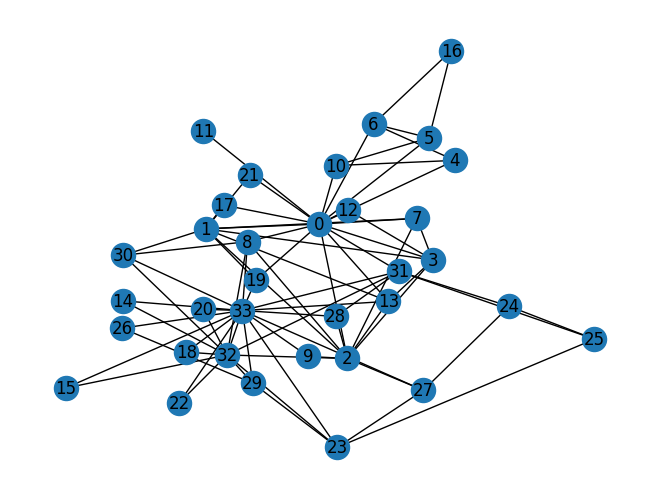

In [5]:
ntx.draw_kamada_kawai(zachary, with_labels=True) # drawing the network

NetworkX library function for link prediction based on Jaccard Similarity. Note, that it only computes the similarity for missing links

In [6]:
Jacard = ntx.jaccard_coefficient(zachary) 

Printing the results - it is in tuples

In [6]:
for tup in Jacard:
    print(tup)

(0, 32, 0.12)
(0, 33, 0.13793103448275862)
(0, 9, 0.058823529411764705)
(0, 14, 0.0)
(0, 15, 0.0)
(0, 16, 0.125)
(0, 18, 0.0)
(0, 20, 0.0)
(0, 22, 0.0)
(0, 23, 0.0)
(0, 24, 0.05555555555555555)
(0, 25, 0.05555555555555555)
(0, 26, 0.0)
(0, 27, 0.05263157894736842)
(0, 28, 0.11764705882352941)
(0, 29, 0.0)
(0, 30, 0.1111111111111111)
(1, 4, 0.09090909090909091)
(1, 5, 0.08333333333333333)
(1, 6, 0.08333333333333333)
(1, 8, 0.2727272727272727)
(1, 9, 0.1)
(1, 10, 0.09090909090909091)
(1, 11, 0.1111111111111111)
(1, 12, 0.2222222222222222)
(1, 14, 0.0)
(1, 15, 0.0)
(1, 16, 0.0)
(1, 18, 0.0)
(1, 20, 0.0)
(1, 22, 0.0)
(1, 23, 0.0)
(1, 24, 0.0)
(1, 25, 0.0)
(1, 26, 0.0)
(1, 27, 0.08333333333333333)
(1, 28, 0.09090909090909091)
(1, 29, 0.0)
(1, 31, 0.07142857142857142)
(1, 32, 0.10526315789473684)
(1, 33, 0.13043478260869565)
(2, 4, 0.08333333333333333)
(2, 5, 0.07692307692307693)
(2, 6, 0.07692307692307693)
(2, 10, 0.08333333333333333)
(2, 11, 0.1)
(2, 12, 0.2)
(2, 14, 0.09090909090909091)
(

If we want the such similarities to be available for all the nodes, they need to be computed

In [7]:
rows = sum(1 for _ in zachary.nodes())
cols = sum(1 for _ in zachary.nodes())

# VS - Vertex Similarity, JS - Jaccard Similarity, CosS - Cosine Similarity

VS = [[0 for _ in range(cols)] for _ in range(rows)]
JS = [[0 for _ in range(cols)] for _ in range(rows)]
CosS = [[0 for _ in range(cols)] for _ in range(rows)]

for u in zachary.nodes():
    for v in zachary.nodes():
        count_neighbrs_u = sum(1 for _ in ntx.neighbors(zachary, u))
        count_neighbrs_v = sum(1 for _ in ntx.neighbors(zachary, v))
        count_common_neighbors_uv = sum(1 for _ in ntx.common_neighbors(zachary,u, v))
        VS[u][v] = count_common_neighbors_uv
        JS[u][v] = count_common_neighbors_uv/(count_neighbrs_v + count_neighbrs_u)
        CosS [u][v] = count_common_neighbors_uv/math.sqrt(count_neighbrs_v * count_neighbrs_u)

print("Vertex Similarity: ")
print(VS)

Vertex Similarity: 
[[16, 7, 5, 5, 2, 2, 2, 3, 1, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 3, 4], [7, 9, 4, 4, 1, 1, 1, 3, 3, 1, 1, 1, 2, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 3], [5, 4, 10, 4, 1, 1, 1, 3, 2, 0, 1, 1, 2, 3, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 3, 3, 1, 6], [5, 4, 4, 6, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], [2, 1, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [2, 1, 1, 1, 3, 4, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [2, 1, 1, 1, 1, 2, 4, 1, 1, 0, 3, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [3, 3, 3, 3, 1, 1, 1, 4, 2, 1, 1, 1, 2, 4, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], [1, 3, 2, 2, 1, 1, 1, 2, 5, 2, 1, 1, 1, 3, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 3, 3, 2], [1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2

In [8]:
print("Jacard Similarity: ")
print(JS)

Jacard Similarity: 
[[0.5, 0.28, 0.19230769230769232, 0.22727272727272727, 0.10526315789473684, 0.1, 0.1, 0.15, 0.047619047619047616, 0.05555555555555555, 0.10526315789473684, 0.0, 0.05555555555555555, 0.14285714285714285, 0.0, 0.0, 0.1111111111111111, 0.05555555555555555, 0.0, 0.05263157894736842, 0.0, 0.05555555555555555, 0.0, 0.0, 0.05263157894736842, 0.05263157894736842, 0.0, 0.05, 0.10526315789473684, 0.0, 0.1, 0.0, 0.10714285714285714, 0.12121212121212122], [0.28, 0.5, 0.21052631578947367, 0.26666666666666666, 0.08333333333333333, 0.07692307692307693, 0.07692307692307693, 0.23076923076923078, 0.21428571428571427, 0.09090909090909091, 0.08333333333333333, 0.1, 0.18181818181818182, 0.21428571428571427, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.08333333333333333, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.08333333333333333, 0.0, 0.0, 0.06666666666666667, 0.09523809523809523, 0.11538461538461539], [0.19230769230769232, 0.21052631578947367, 0.5, 0.25, 0

print("Cosine Similarity: ")
print(CosS)

SimRank as a global similarity - such function exists in NetworkX

In [9]:
SimS = ntx.simrank_similarity(zachary)

In [10]:
print(SimS)

{0: {0: 1.0, 1: 0.33155903641476997, 2: 0.29238299961337955, 3: 0.32787191433826257, 4: 0.29909177996373265, 5: 0.29529550175002023, 6: 0.29884628866406926, 7: 0.3334135836913329, 8: 0.2571450716194331, 9: 0.24952231844583814, 10: 0.3185144401466922, 11: 0.2669502952356752, 12: 0.32318293615778215, 13: 0.30488022540072524, 14: 0.19538547863813732, 15: 0.19609563666945415, 16: 0.32296128690266557, 17: 0.2915831118864864, 18: 0.19649016890907464, 19: 0.2826938225190629, 20: 0.19476409036073514, 21: 0.30389952021189204, 22: 0.19621399634134032, 23: 0.19090743802566026, 24: 0.20610307493701283, 25: 0.21699069523109835, 26: 0.19042126073652021, 27: 0.21779230310540187, 28: 0.2643539078460798, 29: 0.19190007248322172, 30: 0.24478411796332952, 31: 0.19783575730158165, 32: 0.2208254900098528, 33: 0.2263945470267949}, 1: {0: 0.33155903641477, 1: 1.0, 2: 0.31855539438841496, 3: 0.37182014640265687, 4: 0.2923990396126528, 5: 0.26689600962207416, 6: 0.2690729996914807, 7: 0.3623254477288352, 8: 0.

## Exercises and self studies

1. To see the effect of the link prediction, please experiment with by removing some edges from the graph (hiding them from the similarity calculation) and observe:<br>
    a./ how the similarity numbers change<br>
    b./ what could be a good treshold for a similarity cut for link prediction<br>
2. Run an experiment such that you remove 20% of edges. This woulf follow a standard protocol for training/testing - 20% for testing and 80% for training. You could remove them randomly. If you fix the seed, you will always get the same sample, but I suggest that you try with 3-4 different seeds to get different samples. For those nodes, for which you have removed edges, take a list of edges where you have a similarity larger than a selected treshold. Order the tail nodes according to the similarity. Observe for example whether the removed edge is in the recommendation list or not. Calculate a percentage of hits as the nubmer of times the edge was on the prediction list devided by number of all predictions.<br>
3. Load the dataset with paper citations, so called CORA dataset. It is a benchmark for node classification and link prediction methods. The 'Cora' dataset is described at https://relational.fit.cvut.cz/dataset/CORA. For this study, load only a graph. In the following there are some commands to load that dataset. Follow the exercise 1 and 2 for this dataset and observe the same things as asked there.
4. Try to experiment with additional similarity measures from the library or from the survey paper if the time remain (optional)
5. Reflect on your findings and make notes for the exam.
    

In [11]:
# we only read one file to construct the graph. Later in other self studies we may come back to the other files with attributes
coragraph=ntx.readwrite.edgelist.read_edgelist("cora.cites")

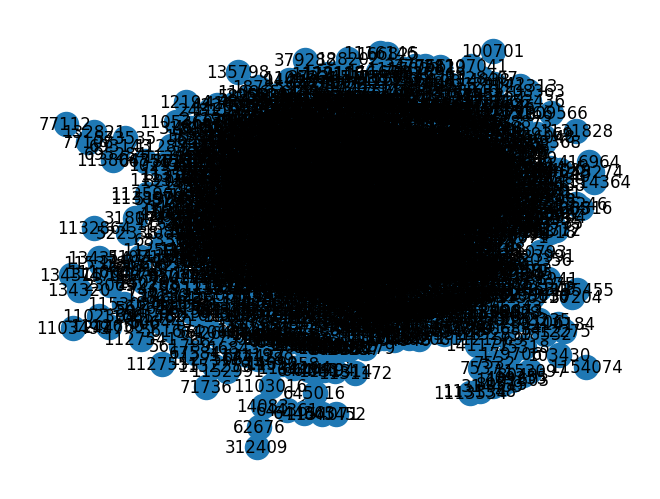

In [12]:
ntx.draw_kamada_kawai(coragraph, with_labels=True) # drawing the network. since this is much larger network, this may take a while